# Assignment 2

## Q1

In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #disables the automatic downcasting of data types ()

In [2]:
df = pd.read_csv('./Cancer_dataset1.csv')

In [3]:
def stats(data, cols):
    filtered_data = data[columns]
    for column in filtered_data.columns:
        print(f"################ {column} Stats ##################")

        col = df[column]
        
        print(f"{column} count = {col.shape[0]}")
        print(f"{column} mean = {col.mean()}")
        print(f"{column} standard deviation = {col.std()}")
        print(f"{column} minimum = {col.min()}")
        print(f"{column} 25% percentile = {col.quantile(0.25)}")
        print(f"{column} 50% percentile = {col.quantile(0.5)}")
        print(f"{column} 75% percentile = {col.quantile(0.75)}")
        print(f"{column} maximum = {col.max()}")

        print("\n")


In [4]:
columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity','mean_concave_points']
# stats(df, columns)

In [5]:
#Summarize the statistics of variable into count, unique value, top value, and frequency of top value. 
outcome = df['outcome']
count = outcome.shape[0]
print(f"total rows = {count}")

unique_value = outcome.unique()
print(f"unique values = {unique_value}")

top_value = outcome.value_counts().index[0]
print(f"top value = {top_value}")

frequency_top = outcome.value_counts().max()
print(f"top value frequency = {frequency_top}")  

unique_val_counts = outcome.value_counts()
print(f"unique value frequency = {unique_val_counts}")

total rows = 198
unique values = ['N' 'R']
top value = N
top value frequency = 151
unique value frequency = outcome
N    151
R     47
Name: count, dtype: int64


In [6]:
# Encoding categorical to numerical
# R: Recurrence of the cancer.
# N: No recurrence of the cancer.

#label encoding: replacing category to integer value (since the category is of only two type, One-hot Encoding is not used)
encoded_outcome = outcome.replace({'R': 1, 'N': 0})
# encoded_outcome

In [7]:
# correlation between mean_perimeter and se_perimeter
print(f"correlation between mean_perimeter and se_perimeter = {df['mean_perimeter'].corr(df['se_perimeter'])}")

correlation between mean_perimeter and se_perimeter = 0.6099643781634989


In [8]:
df.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [9]:
# df.info()

In [10]:
# df.isnull().sum()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# corr_matrix = df.drop(columns=['outcome', 'id']).corr()

# plt.figure(figsize=(20,20))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix Heatmap")
# plt.show()

## Q2

In [136]:
#import libraries
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True) #disables the automatic downcasting of data types ()
import matplotlib.pyplot as plt
import copy
import math

In [137]:
# This class manipulates data from a csv file
class ManipulateData:

    #initialize file
    def __init__(self, file):
        self.file = file

    #Reads the supplied file and shuffles the data
    def filter_data(self):
        data = pd.read_csv(self.file).dropna()
        data = data.sample(frac = 1, random_state=20) #shuffling and ensuring everytime output is same shuffled data
        return data

    #Filter with respect to column passed as an argument 
    def seperate_columns(self, data, columns):
        data = data[columns]
        return data

    #splits data to train and test data and returns train and test data as numpy array
    #only training percentage is passed as an argument 
    def split_data(self, data, percent):
        data_array = data.to_numpy()
        train_size = math.floor(len(data_array)*percent) #takes integer as training size
        #training and testing data are seperated as two numpy arrays inside tuple
        train_data, test_data = data_array[:train_size,:], data_array[train_size:,:] 

        
        train_length = train_data.shape[0]
        test_length = test_data.shape[0]
        print(f"total training rows: {train_length}\ntotal testing rows: {test_length}")
        
        return train_data, test_data

    #separate features and target
    def seperate_target(self, data):
        rows = data.shape[0]
        features = []
        target = []
        for row in range(rows):
            features.append(data[row, :-1])
            target.append(data[row, -1])
        return np.array(features), np.array(target)

    # scale features using mean normalization and returns numpy array
    def scale_features(self, data):
        # calculate mean, minimum, and maximum for each column of the features
        feature_mean = np.mean(data, axis=0) #axis 0 refers to the column and axis 1 for row
        feature_max = np.max(data, axis=0)
        feature_min = np.min(data, axis=0)
        feature_std = np.std(data, axis=0)

        scaled_data = []

        # normalize and append each rows of features to new array 
        for row in data:
            scaled_row = []
            for i in range(len(row)):
                # scaled_value = (row[i] - feature_min[i]) / (feature_mean[i] - feature_min[i])
                scaled_value = (row[i] - feature_min[i]) / (feature_std[i])
                scaled_row.append(scaled_value)
            scaled_data.append(scaled_row)

        return np.array(scaled_data)
    

In [170]:
# Read file and clear out null values
file = 'Cancer_dataset1.csv'

df = ManipulateData(file)
data = df.filter_data() #cleans out rows containing null values and shuffles the data
data['outcome'] = data['outcome'].replace({'R': 1, 'N': 0}).astype(float)
data

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
171,926682,0.0,20,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.1440,...,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,1.0,0.0
139,90312,0.0,13,19.55,23.21,128.9,1174.0,0.10100,0.13180,0.1856,...,142.0,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602,4.0,13.0
117,89122,0.0,17,19.71,19.06,129.5,1192.0,0.10180,0.13520,0.1696,...,157.6,1659.0,0.1411,0.3993,0.4645,0.1925,0.4054,0.08621,4.0,15.0
126,897428,0.0,34,17.06,21.00,111.8,918.6,0.11190,0.10560,0.1508,...,143.2,1362.0,0.1449,0.2053,0.3920,0.1827,0.2623,0.07599,1.5,0.0
123,894618,0.0,66,20.16,19.66,131.1,1274.0,0.08020,0.08564,0.1155,...,150.2,1657.0,0.1054,0.1537,0.2606,0.1425,0.3055,0.05933,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,915143,1.0,7,24.24,18.74,159.6,1945.0,0.08938,0.11360,0.1727,...,232.2,3903.0,0.1154,0.1772,0.2917,0.1795,0.2336,0.06259,3.0,4.0
148,909445,0.0,13,17.27,25.42,112.4,928.8,0.08331,0.11090,0.1204,...,132.8,1284.0,0.1436,0.4122,0.5036,0.1739,0.2500,0.07944,9.0,0.0
170,926424,0.0,28,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.2439,...,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,1.2,0.0
18,852552,0.0,96,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,...,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564,3.0,0.0


In [185]:

# majority_data = data[data['outcome'] == 0]
# minority_data = data[data['outcome'] == 1]

# # Print to check if separation is correct
# print("Class 0 samples:", len(majority_data))
# print("Class 1 samples:", len(minority_data))

# train_percent = 0.8

# # Split majority class (0)
# class_0_train = majority_data.sample(frac=train_percent, random_state=20)
# class_0_test = majority_data.drop(class_0_train.index)

# # Split minority class (1)
# class_1_train = minority_data.sample(frac=train_percent, random_state=20)
# class_1_test = minority_data.drop(class_1_train.index)

# # Merge train sets and shuffle
# train_data = pd.concat([class_0_train, class_1_train]).sample(frac=1, random_state=20)

# # Merge test sets and shuffle
# test_data = pd.concat([class_0_test, class_1_test]).sample(frac=1, random_state=20)

# print("Train set class distribution:")
# print(train_data['outcome'].value_counts())

# print("\nTest set class distribution:")
# print(test_data['outcome'].value_counts())


Class 0 samples: 141
Class 1 samples: 41
Train set class distribution:
outcome
0.0    113
1.0     33
Name: count, dtype: int64

Test set class distribution:
outcome
0.0    28
1.0     8
Name: count, dtype: int64


In [227]:
##############################################
######## SELECTION OF DATA BY SIZE ###########
##############################################
majority_data = data[data['outcome'] == 0]
minority_data = data[data['outcome'] == 1]

# Print to check if separation is correct
print("Class 0 samples:", len(majority_data)) # 141
print("Class 1 samples:", len(minority_data)) # 41

class_0_train_size = 30
class_0_test_size = 10

class_1_train_size = 30
class_1_test_size = 10

# Split majority class (0)
class_0_train = majority_data.sample(n = class_0_train_size, random_state=20)
class_0_test = majority_data.drop(class_0_train.index).sample(n = class_0_test_size, random_state=20)

# Split minority class (1)
class_1_train = minority_data.sample(n = class_1_train_size, random_state=20)
class_1_test = minority_data.drop(class_1_train.index).sample(n = class_1_test_size, random_state=20)

# Merge train sets and shuffle
train_data = pd.concat([class_0_train, class_1_train]).sample(frac=1, random_state=20)

# Merge test sets and shuffle
test_data = pd.concat([class_0_test, class_1_test]).sample(frac=1, random_state=20)

print("Train set class distribution:")
print(train_data['outcome'].value_counts())

print("\nTest set class distribution:")
print(test_data['outcome'].value_counts())

Class 0 samples: 141
Class 1 samples: 41
Train set class distribution:
outcome
0.0    30
1.0    30
Name: count, dtype: int64

Test set class distribution:
outcome
1.0    10
0.0    10
Name: count, dtype: int64


In [228]:
# #first seperate columns by passing column names and after required columns are obtained from the data we split 80% of data as training data
# #index of the columns defined will be the same index on the array as well
# columns = ['mean_area', 'outcome'] #the final column will be the target value when you use 'seperate_target(data) method
# sprtd_data = df.seperate_columns(data, columns)

# split_percent = 0.8
# train_data, test_data = df.split_data(sprtd_data, split_percent)

# # now seperate features and target as two seperate arrays with each features index corresponding to target index
# features, target = df.seperate_target(train_data)
# scaled_features = df.scale_features(features)

# test_features, test_target = df.seperate_target(test_data)

###########################
######stratified#########
########################
#first seperate columns by passing column names and after required columns are obtained from the data we split 80% of data as training data
#index of the columns defined will be the same index on the array as well
columns = ['mean_area', 'outcome'] #the final column will be the target value when you use 'seperate_target(data) method
sprtd_train_data = df.seperate_columns(train_data, columns)
sprtd_test_data = df.seperate_columns(test_data, columns)
# np.array(sprtd_train_data)
# now seperate features and target as two seperate arrays with each features index corresponding to target index
features, target = df.seperate_target(np.array(sprtd_train_data))
scaled_features = df.scale_features(features)

test_features, test_target = df.seperate_target(np.array(sprtd_test_data))

In [229]:
unique_elements, counts = np.unique(target, return_counts=True)

print("Unique elements :", unique_elements)
print("Counts on train:", counts)

unique_elements, counts = np.unique(test_target, return_counts=True)

print("Unique elements:", unique_elements)
print("Counts on test:", counts)

Unique elements : [0. 1.]
Counts on train: [30 30]
Unique elements: [0. 1.]
Counts on test: [10 10]


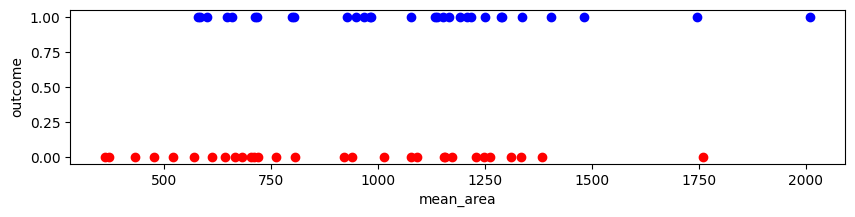

In [230]:
plt.figure(figsize=(10,2))
plt.scatter(features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
plt.scatter(features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
# plt.scatter(scaled_features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(scaled_features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
plt.xlabel('mean_area')
plt.ylabel('outcome')
plt.show()

In [231]:
class LL:
    # calculating cost using vectorization('np.dot()')
    def calculate_cost(self, features, target, th0, thj):
            
        m = features.shape[0]

        # use vectorization to find dot product of two matrices (features and weights)
        y_predict = th0 + np.dot(features, thj)

        sigmoid = 1/(1+np.exp(-y_predict))
        # print(f'sigmoid = {sigmoid}')
        
        cost = (target * np.log(sigmoid) + ((1-target) * np.log(1 - sigmoid)))
        
        total_cost = np.sum(cost) * (-1/m)
    
        return total_cost

In [232]:
class LogisticRegression(LL):
    def __init__(self, alpha, iterations):
        super().__init__()
        self.alpha = alpha
        self.iterations = iterations

    #this method computes gradient using vectorization and utilizes the broadcasting power of numpy
    def calculate_gradient(self, features, target, th0, thj):
        m = features.shape[0]
        
        y_predict = th0 + np.dot(features, thj) #get numpy array containing predicted y of each row
        y_predict = y_predict.astype(np.float64)
        sigmoid = 1 / (1 + np.exp(-y_predict)) # (broadcasting is used to do matrix manipulation)
        
        difference  = sigmoid - target
        gradient_th0 = np.sum(difference) / m #difference is an array of differences so we need to sum all and divide my number of rows

        #vectorization used to find dot product and gets matrix with the same shape of weight
        #broadcasting is utilized on difference and m
        gradient_thj = np.dot(difference, features) / m 

        return gradient_th0, gradient_thj

    # utilizes gradient descent formula  to get optimal weights and bias
    def gradient_descent(self, features, target, th0, thj):

        j_history = []
        
        for i in range(self.iterations):
            gradients = self.calculate_gradient(features, target, th0, thj)
            
            th0 = th0 - (self.alpha * gradients[0])
            thj = thj - (self.alpha * gradients[1])

            # check cost over iteration
            if i%10 == 0 or i == self.iterations - 1:
                current_cost = self.calculate_cost(features, target, th0, thj)
                j_history.append([i, current_cost])
                # print(f"Iteration: {i}\t Cost: {current_cost:.3f}\t Bias: {th0:.3f}\t Weight: {np.round(thj, 3)}")
                # print(f"Iteration: {i}\t Cost: {current_cost}\t Bias: {th0}\t Weight: {thj}")
        
        return th0, thj, j_history

    


In [233]:
class Evaluation():

    def __init__(self, th0, thj):
        self.th0 = th0
        self.thj = thj

    def sigmoid(self, features, th0, thj):
        y_predict = th0 + np.dot(features, thj)

        sigmoid = sigmoid = 1/(1+np.exp(-y_predict))

        return sigmoid
        
    def predict(self, features, th0, thj, threshold):
        # use vectorization to find dot product of two matrices (features and weights)
        y_predict = th0 + np.dot(features, thj)

        sigmoid = 1/(1+np.exp(-y_predict))
        # print(sigmoid)

        predictions = []
        # predictions[sigmoid<threshold] = 0
        for i in range(len(sigmoid)):
            if sigmoid[i] >= threshold:
                predictions.append(1)
            else:
                predictions.append(0)
        return np.array(predictions)

    def threshold_selection(self, features, y):
        sigmoid = self.sigmoid(features, self.th0, self.thj)
        best_threshold = 0
        f1score = 0
        threshold = 0
        
        while (threshold < 1):
            predictions = self.predict(features, self.th0, self.thj, threshold)
            TP, FP, TN, FN = self.confusion_matrix(predictions, y)
            precision, recall = self.precision_recall(TP, FP, TN, FN)
            f1 = self.F1(precision, recall)
            if f1 > f1score:
                f1score = f1
                best_threshold = threshold
            threshold += 0.1
        return best_threshold
    
    def confusion_matrix(self, predictions, y):
        m = predictions.shape[0]

        TP = 0
        FP = 0
        TN = 0
        FN = 0
        
        for i in range(m):
            if predictions[i] == 0 and y[i] == 0:
                TN += 1
            elif predictions[i] == 1 and y[i] == 1:
                TP += 1
            elif predictions[i] == 1 and y[i] == 0:
                FP += 1
            elif predictions[i] == 0 and y[i] == 1:
                FN += 1
            else:
                pass

        return TP, FP, TN, FN

    def precision_recall(self, TP, FP, TN, FN):
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        return precision, recall

    def F1(self, precision, recall):
        score = (2 * precision * recall) / (precision + recall)
        return score

In [234]:
#initialize weight, biases and hyperparameters
bias = 0
weights = np.zeros(features.shape[1])
learning_rate = 0.01
iterations = 10000

#create object for linear regression class
fit = LogisticRegression(learning_rate, iterations)
# fit.calculate_gradient(np.array([[1],[2],[3],[4],[5],[6],[7],]), np.array([0,0,0,1,1,1,1]), bias, weights)


# compute final weights and biases using gradient descent
prdtd_bias, prdtd_weights, costs = fit.gradient_descent(scaled_features, target, bias, weights)
print(f"\n\nfinal bias = {prdtd_bias} \t final weights = {prdtd_weights}")

# fit.calculate_gradient(features, target, -5.000000145436743e-05, [-0.04881])




final bias = -0.8606521246615302 	 final weights = [0.48825456]


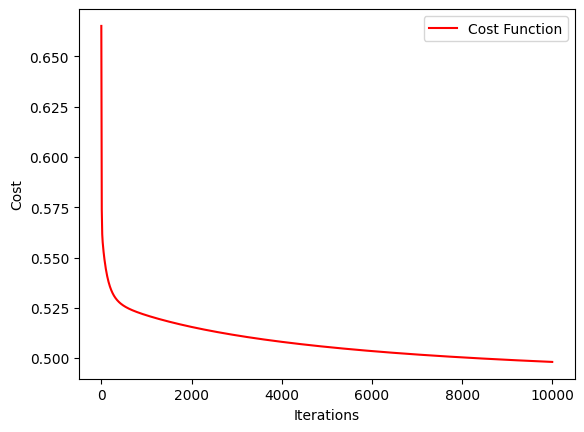

In [247]:
iterations = [iteration[0] for iteration in costs]
J = [j[1] for j in costs]


plt.plot(iterations, J, color='red', linestyle='-', label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

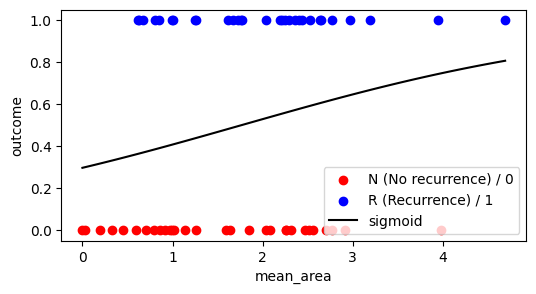

In [237]:
def sigmoid(feature, bias, weight):
    z = bias + (feature * weight)
    sig = 1 / (1 + np.exp(-z))

    return sig
    

# X = [x[0] for x in features]
X = np.linspace(min(scaled_features), max(scaled_features), 100)
# X = np.linspace(min(features), max(features), 100)

Y = [sigmoid(x, prdtd_bias, prdtd_weights[0]) for x in X]
# Y = [sigmoid(x, -2.21805736, 0.00102888) for x in X]


plt.figure(figsize=(6,3))
# plt.scatter(features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")
plt.scatter(scaled_features[target==0], target[target==0], color='red', label="N (No recurrence) / 0")
plt.scatter(scaled_features[target==1], target[target==1], color='blue', label="R (Recurrence) / 1")

plt.plot(X, Y, color='black', linestyle='-', label='sigmoid')

plt.xlabel('mean_area')
plt.ylabel('outcome')
plt.legend()
plt.show()

In [238]:
evaluate = Evaluation(prdtd_bias, prdtd_weights)
# threshold = evaluate.threshold_selection(features, target)
threshold = 0.2
prediction = evaluate.predict(scaled_features, prdtd_bias, prdtd_weights, threshold)
prediction

tp, fp, tn, fn = evaluate.confusion_matrix(prediction, target)
print(f"TP = {tp} FP = {fp} TN = {tn} FN= {fn}")
precision, recall = evaluate.precision_recall(tp, fp, tn, fn)
print(f"Precision = {precision} Recall = {recall}")
f1 = evaluate.F1(precision, recall)
print(f"F1 Score = {f1}")

TP = 30 FP = 30 TN = 0 FN= 0
Precision = 0.5 Recall = 1.0
F1 Score = 0.6666666666666666


In [239]:
# x_train = np.array([[0.], [1], [2], [3], [4], [5]])
# y_train = np.array([0,  0, 0, 1, 1, 1])

# plt.figure(figsize=(6,3))
# plt.scatter(x_train[y_train==0], y_train[y_train==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(x_train[y_train==1], y_train[y_train==1], color='blue', label="R (Recurrence) / 1")

In [240]:
# bias_t = 0.1
# weights_t = np.zeros(features.shape[1])
# learning_rate_t = 0.1
# iterations_t = 500

# fit_t = LogisticRegression(learning_rate_t, iterations_t)

# x_train = np.array([[1], [2], [3], [4], [5], [6], [7], [30], [40], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]])
# y_train = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# prdtd_bias_t, prdtd_weights_t, costs_t = fit_t.gradient_descent(x_train, y_train, bias_t, [0.2])#weights_t)
# print(f"\n\nfinal bias = {prdtd_bias_t} \t final weights = {prdtd_weights_t}")

In [241]:
# def sigmoid_t(feature, bias, weight):
#     z = bias + (feature * weight)
#     sig = 1 / (1 + np.exp(-z))

#     return sig
    

# # X_t = [x[0] for x in x_train]
# X_t = np.linspace(min(x_train), max(x_train), 100)
# Y_t = [sigmoid_t(x, prdtd_bias_t, prdtd_weights_t[0]) for x in X_t]

# plt.figure(figsize=(6,3))
# plt.scatter(x_train[y_train==0], y_train[y_train==0], color='red', label="N (No recurrence) / 0")
# plt.scatter(x_train[y_train==1], y_train[y_train==1], color='blue', label="R (Recurrence) / 1")

# plt.plot(X_t, Y_t, color='pink', linestyle='-', label='sigmoid')

# plt.xlabel('mean_area')
# plt.ylabel('outcome')
# plt.legend()
# plt.show()

## Q3

In [242]:
#first seperate columns by passing column names and after required columns are obtained from the data we split 80% of data as training data
#index of the columns defined will be the same index on the array as well
columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_fractal_dimension', 'se_perimeter', 'se_texture', 'se_area', 'outcome']
 #the final column will be the target value when you use 'seperate_target(data) method
sprtd_data = df.seperate_columns(data, columns)

split_percent = 0.8
train_data, test_data = df.split_data(sprtd_data, split_percent)

# now seperate features and target as two seperate arrays with each features index corresponding to target index
features, target = df.seperate_target(train_data)
scaled_features = df.scale_features(features)

test_features, test_target = df.seperate_target(test_data)

total training rows: 145
total testing rows: 37


In [243]:
#initialize weight, biases and hyperparameters
bias = 0
weights = np.zeros(features.shape[1])
learning_rate = 0.01
iterations = 10000

#create object for linear regression class
fit = LogisticRegression(learning_rate, iterations)
# fit.calculate_gradient(np.array([[1],[2],[3],[4],[5],[6],[7],]), np.array([0,0,0,1,1,1,1]), bias, weights)


# compute final weights and biases using gradient descent
prdtd_bias, prdtd_weights, costs = fit.gradient_descent(scaled_features, target, bias, weights)
print(f"\n\nfinal bias = {prdtd_bias} \t final weights = {prdtd_weights}")



final bias = -0.5756738248962192 	 final weights = [-0.30429153 -0.08963618 -0.02698083  0.24421587  0.50053636  0.41419568
 -0.62928515  0.40694452 -0.89399674  0.63277319 -0.38070025 -0.30218032]


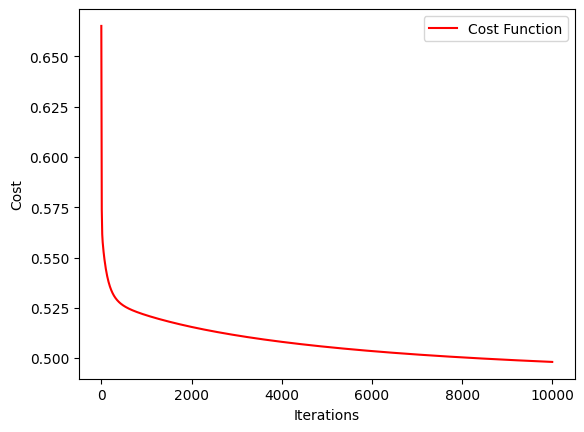

In [249]:
iterations = [iteration[0] for iteration in costs]
J = [j[1] for j in costs]


plt.plot(iterations, J, color='red', linestyle='-', label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [245]:
threshold = 0.3
evaluate = Evaluation()
prediction = evaluate.predict(scaled_features, prdtd_bias, prdtd_weights, threshold)
prediction

tp, fp, tn, fn = evaluate.confusion_matrix(prediction, target)
print(f"TP = {tp} FP = {fp} TN = {tn} FN= {fn}")
precision, recall = evaluate.precision_recall(tp, fp, tn, fn)
print(f"Precision = {precision} Recall = {recall}")
f1 = evaluate.F1(precision, recall)
print(f"F1 Score = {f1}")

TypeError: Evaluation.__init__() missing 2 required positional arguments: 'th0' and 'thj'

In [ ]:
def feature_selection(columns, ):
    
    

In [ ]:
rand = np.random.rand(3,2)
rand

In [ ]:
np.exp(-rand)

In [ ]:
a = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0]
a = np.array(a)
print(a)
print(type(a))
print(type(a[0]))
np.exp(-a)